<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICBinaryClassifIris19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get an overview of supervised learning (classification problems)
Enable classification using scikit-learn
Make a brief comparison of the methods.

You will practice solving classification problems using the iris dataset used in Week 3.

The iris data set consisted of the following 3 types of irises, 150 in total, collected on the same day in a pasture on the Gaspé Peninsula, Canada.

Iris setosa --Wikipedia
Iris virgicolor --Wikipedia
Iris virginica --Wikipedia
You can solve the problem of guessing the type of iris from 4 types of features (explanatory variables). Since we                   classify    types of irises, this is called a classification problem.
We will use scikit-learn to learn and estimate using the following methods. We will not deal with the details of each method at this stage. We will simply look at the fact that all of the methods can be easily used with the library and that there are differences in the results for each method.


Nearest neighbor method

Logistic regression

SVM

Decision tree

Random forest

First, we will introduce the basic flow of solving classification problems using the nearest neighbor method as an example. In the second half of the assignment, you will be asked to use this as a reference and apply it to other methods as well.

We will learn and practice this flow in more depth later. In this assignment, please have a rough understanding of the flow.

Since we want to visualize the results in practice, we will use only two of the four features. In this way, we can draw a two-dimensional scatter plot and check the results. Also, to simplify the problem, we will use only two types of iris. When there are two types of classification targets, we call it binary classification and distinguish it from multi-level classification . The methods and evaluations vary for each. In this assignment, we will start with the more basic binary classification.

**[Problem 1] Select features and categories for practice**

There are a total of 18 ways to choose, but we will practice with the following combinations. After retrieving the iris data set as in Week 3, extract these from the data frame.

virgicolor and virginica
sepal_length and petal_length
<Actual problem>

Visualization of the results is also effective in solving real problems. However, it is not desirable to limit the number of features used for training and estimation to two for this purpose. Therefore, learning and estimation are done in multiple dimensions, and feature extraction methods such as Principal Component Analysis are applied only for visualization. It is also possible to visualize the data using the scatter plot matrix used in Week 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()


In [3]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['species'])

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


     sepal length (cm)  petal length (cm)
50                 7.0                4.7
51                 6.4                4.5
52                 6.9                4.9
53                 5.5                4.0
54                 6.5                4.6
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[100 rows x 2 columns]


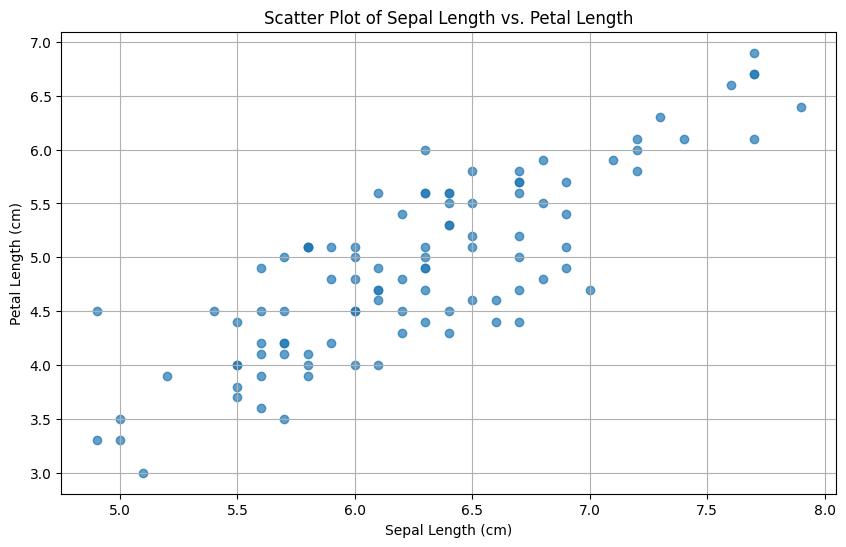

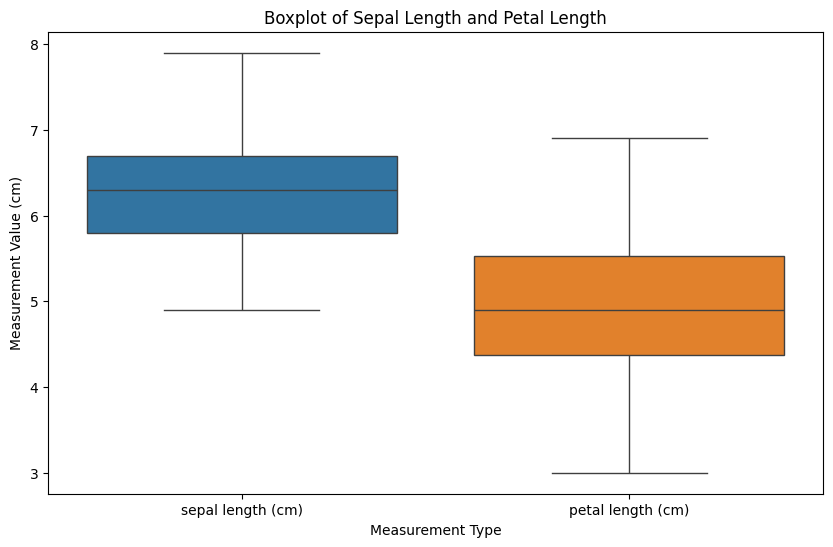

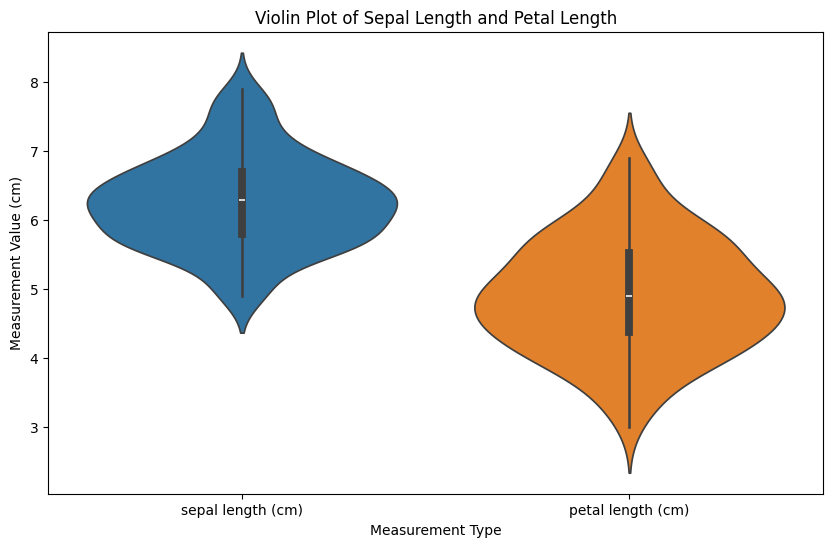

In [5]:
import seaborn as sns
# Filter the rows where the species is either 1.0 (versicolor) or 2.0 (virginica)
filtered_df = df[(df['species'] == 1.0) | (df['species'] == 2.0)]

# Select only the 'sepal length (cm)' and 'petal length (cm)' columns
result_df = filtered_df[['sepal length (cm)', 'petal length (cm)']]

# Print the filtered DataFrame
print(result_df)

# Plotting

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['sepal length (cm)'], result_df['petal length (cm)'], alpha=0.7)
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=result_df)
plt.title('Boxplot of Sepal Length and Petal Length')
plt.xlabel('Measurement Type')
plt.ylabel('Measurement Value (cm)')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=result_df)
plt.title('Violin Plot of Sepal Length and Petal Length')
plt.xlabel('Measurement Type')
plt.ylabel('Measurement Value (cm)')
plt.show()

**[Problem 2] Data analysis**

Scatter plot Petal length - Sepal Length

The scatter plot shows the relationship between petal length and sepal length, this relationship has a positive tendency.

The distribution of sepal length shows a peak around the 6.0 to 6.5 cm range, suggesting that most data points fall within this interval.
The distribution is relatively symmetric around this peak.

The distribution of petal length is more spread out compared to sepal length.
Most data points are clustered around 4.5 to 5.5 cm, indicating a peak in this range

**[Problem 3] Division of preprocessing/training data and verification data**

This time, divide the data into 75% training data and 25% validation data.

You can use scikit-learn's train_test_split . Please refer to the examples in the official documentation to run it.

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

"important point"

We used Pandas DataFrame to analyze the data. However, scikit-learn is designed to work with NumPy ndarray. Therefore, let's convert to ndarray at this stage. The feature (explanatory variable) is stored in X and the correct answer (objective variable) is stored in an ndarray called y.

<Reason for splitting up>

The goal of a classification problem is to correctly classify unknown data. In order to check whether this goal is achieved, we leave some of the data for which we actually know the answer, but not for training. The data not used for training is used for estimation, and the index values obtained from the estimation are used for verification. The data used for training is the training data, and the data used for verification is the verification data, and the ratio is generally 7:3 to 8:2.

In [7]:
# The data set was load using pd from pandas, for this reason our data set is a Dataframe. Pandas
# scikit-learn is designed to work with NumPy ndarrays. An ndarray is a powerful n-dimensional array object which is a part of the NumPy library. It is the standard data structure for numerical computations in Python
# Assuming the target variable is in a column named 'target' and the rest are features
X = df.drop(columns='species')  # Features
y = df['species']  # Target variable

# Convert DataFrame to ndarray
X_array = X.to_numpy()
y_array = y.to_numpy()

In [8]:
X_array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [10]:

#training and verification dataset
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**[Problem 4] Pretreatment/Standardization**

We perform processing to improve classification accuracy. The appropriate method differs depending on the method, but here we will use standardization as an example.

A library for standardization is also available in scikit-learn. Please use this to standardize.

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

"important point"

For standardization, fit is performed on the training data, and transform is done on both the training and validation data. Since the validation data is a substitute for unknown data that does not exist in the training phase, it should not be used to calculate the mean and standard deviation for standardization. Also, since this is a classification problem, there is no need to standardize the labels.

<What about the preprocessing in the actual problem?>

It is unlikely to be provided in a clean and easy-to-use situation like the iris dataset. Various processing is required while performing analysis. For example assignment 2 of Week3, the missing value may be complemented in some cases. You can also check outliers and organize multiple datasets.

In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Output the shapes of the resulting arrays to verify
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (112, 4)
X_test_scaled shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


**[Problem 5] Learning and estimation**

We will train with the nearest neighbor method (k-nearest neighbors, k-nn), please refer to the examples in the official scikit-learn document to train k-nn. The input here is the training data.

link: sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

After training is complete, enter the validation data into the predict method to make an estimate.

There are multiple parameters, but we will not focus on understanding them right now. The most basic element is the number of n_neighbors , so let's try more than one of these. Do the defaults of 5, and 1 and 3 at a minimum. The case of 5 is called 5-nn , the case of 3 is 3-nn , and so on.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = neigh.predict(X_test_scaled)
print("Predictions:", y_pred)

# Predict probabilities on the test data
y_pred_proba = neigh.predict_proba(X_test_scaled)
print("Prediction Probabilities:", y_pred_proba)

Predictions: [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0.]
Prediction Probabilities: [[0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.2 0.8]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [1.  0.  0. ]]


**[Problem 6] Evaluation**

The trained model is evaluated by calculating the closeness between the estimated value obtained through inputting the features of the validation data and the correct answer value of the validation data.

There are several metrics for evaluating binary classification: Accuracy (correct answer rate) , Precision, Recall and F-measure. To understand the meaning of each of them, we can look at the Confusion matrix.

Calculate 4 types of indicators using scikit-learn
Display the confusion matrix using scikit-learn
Briefly research and summarize in writing the meaning of the four types of index values.
link: sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation

link: sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation

link: sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation

link: sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation

link: sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation

**Confusion Matrix**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Predict on the test data
y_pred = neigh.predict(X_test_scaled)


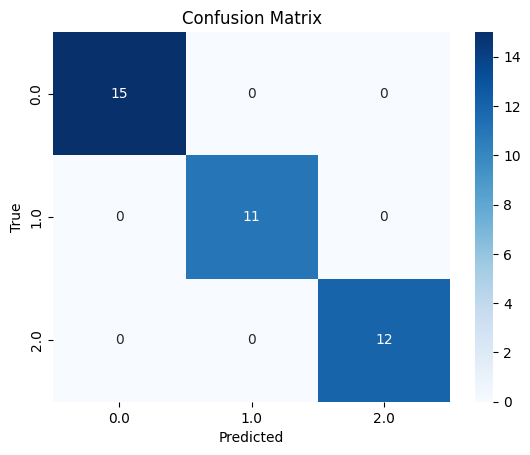

In [15]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=neigh.classes_, yticklabels=neigh.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Accuracy**

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print("Accuracy:", acc)

Accuracy: 1.0


**Precision**

In [21]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred, average='weighted')
print("Precision Score", ps)


Precision Score 1.0


**Recall**

In [22]:
from sklearn.metrics import recall_score
rc = recall_score(y_test, y_pred, average='weighted')
print("Recall Score", rc)

Recall Score 1.0


**F-Measure**

In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F-Measure", f1)

F-Measure 1.0


Briefly research and summarize in writing the meaning of the four types of index values.

First, according to the confusion matrix, all predicted values match the true values. For this reason, all performance indicators are 1

Accuracy is 1 (or 100%) because the number of correct predictions (sum of the diagonal elements of the confusion matrix) equals the total number of instances.
Precision is 1 for each class because there are no false positives (the model does not misclassify any instance as a different class).
Recall is 1 for each class because there are no false negatives (the model correctly identifies all instances of each class).
F1 Score is 1 for each class because both precision and recall are 1, making the harmonic mean of 1 and 1 also 1.

Explanation:

Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions.
Precision: The proportion of true positive predictions out of all positive predictions made by the model.
Recall: The proportion of true positive predictions out of all actual positive instances.
F1 Score: The harmonic mean of precision and recall.

**[Problem 7] Visualization**

As part of the evaluation process, visualization is performed. In this case, we used 2-dimensional features for classification, so we can visualize them in a scatter plot. We have prepared a function that draws a decision region that determines how to divide the data. For X and y, give the training data or the validation data.

In [43]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['species'] = iris['target']

# Verify DataFrame structure
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


<ipython-input-58-c7e5a76aeb3e>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


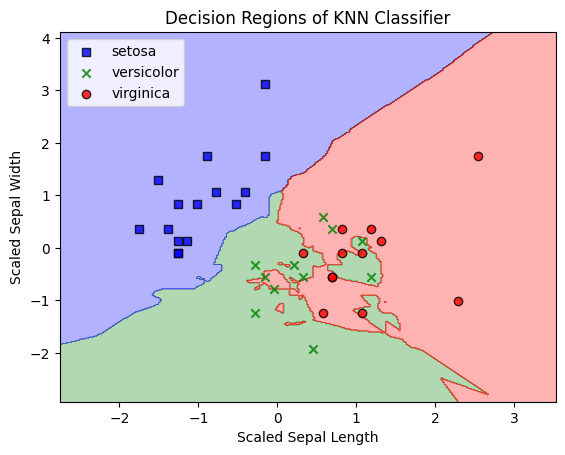

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions
decision_region(X_test_scaled, y_test, model=neigh,
                title='Decision Regions of KNN Classifier',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

**[Problem 8] Learning by other methods**



Logistic Regresion

<ipython-input-83-b5506bbbb1f0>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


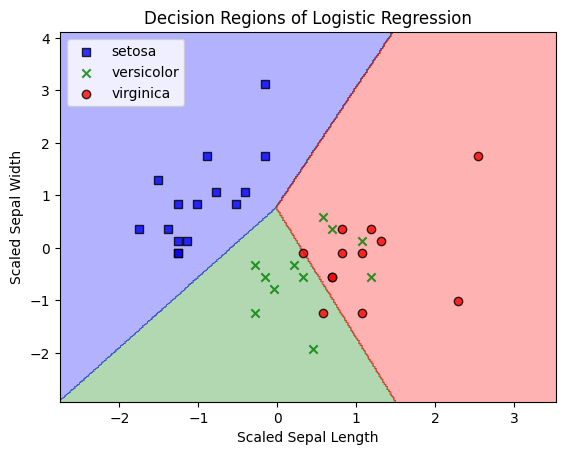

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions for Logistic Regression
decision_region(X_test_scaled, y_test, model=logreg,
                title='Decision Regions of Logistic Regression',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are defined as per your dataset

# Train the Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy of Logistic Regression: {accuracy_log_reg:.4f}")

Accuracy of Logistic Regression: 0.8421


SVM

<ipython-input-87-c9d97af63c45>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


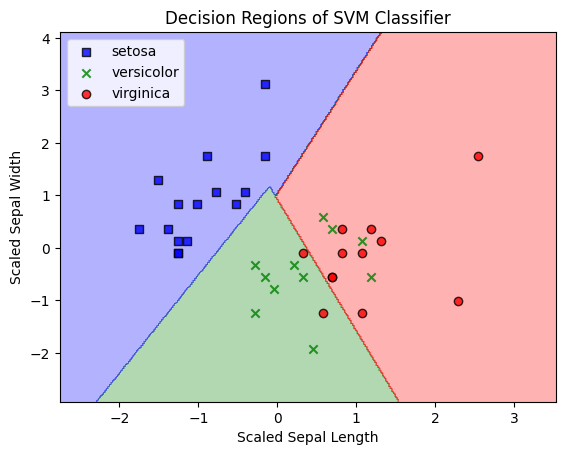

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions for SVM
decision_region(X_test_scaled, y_test, model=svm_classifier,
                title='Decision Regions of SVM Classifier',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

In [88]:
from sklearn.svm import SVC

# Train the SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.4f}")

Accuracy of SVM: 0.7632


Decision Tree

<ipython-input-89-24d53a4497b9>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


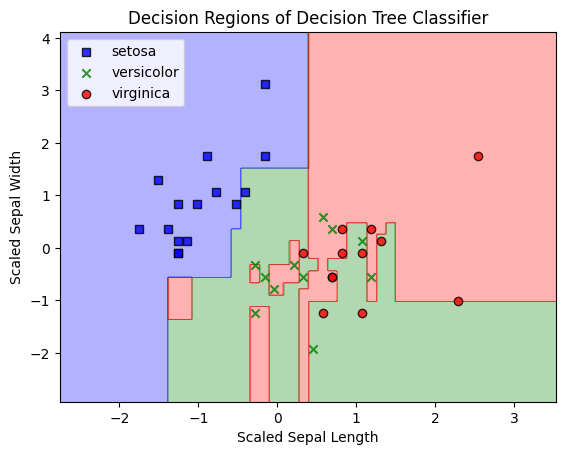

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions for Decision Tree
decision_region(X_test_scaled, y_test, model=dt_classifier,
                title='Decision Regions of Decision Tree Classifier',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt:.4f}")

Accuracy of Decision Tree: 0.6579


Random Forest

<ipython-input-91-bb5672ef094c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


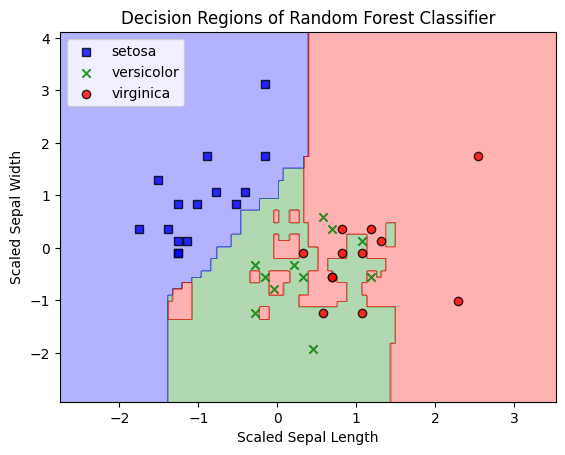

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions for Random Forest
decision_region(X_test_scaled, y_test, model=rf_classifier,
                title='Decision Regions of Random Forest Classifier',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")

Accuracy of Random Forest: 0.7895


Nearest neighbor method

<ipython-input-93-c103796f389a>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


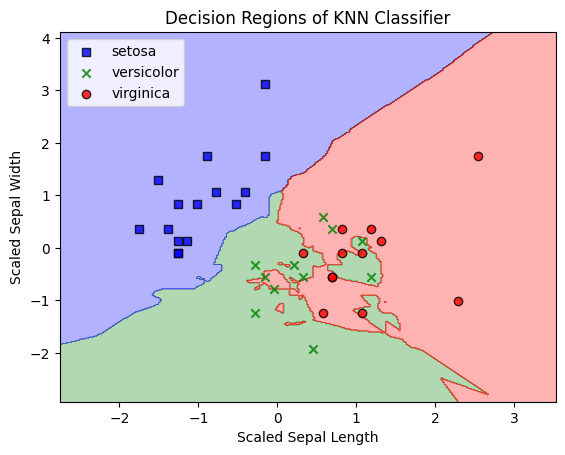

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Function to visualize decision regions
def decision_region(X, y, model, title, xlabel, ylabel, target_names):
    markers = ('s', 'x', 'o')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[cl],
                    edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

# Visualize decision regions for KNN
decision_region(X_test_scaled, y_test, model=knn_classifier,
                title='Decision Regions of KNN Classifier',
                xlabel='Scaled Sepal Length', ylabel='Scaled Sepal Width',
                target_names=iris.target_names)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are defined as per your dataset

# Train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN Classifier: {accuracy_knn:.4f}")

Accuracy of KNN Classifier: 0.7895


****

**[Problem 9] (Advanced task) Comparison with and without standardization**

What results would be obtained if you did not use standardization as a preprocessing step? Make a table of the index values and a diagram of the decision domain for each method, and compare and discuss the results. In your discussion, please include what standardization means as a preprocessing step in machine learning

Standardization in machine learning refers to the process of transforming the features (variables) of a dataset to have zero mean and unit variance. This preprocessing step is crucial because it:

Normalizes the Scale: Ensures that all features are on a similar scale, preventing some features from dominating due to their larger numerical ranges.

Improves Model Performance: Many machine learning algorithms perform better when features are standardized. Algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and others that rely on distance metrics or gradient descent can converge faster and more accurately.

Makes Interpretation Easier: Standardized features are easier to interpret since they are on a common scale, allowing direct comparison of their effects on the model.

Discuss how standardization affects each classifier:


KNN: Distance-based classifiers like KNN can be heavily influenced by feature scales. Without standardization, some features might dominate due to their larger scales, affecting neighbor distances.


Logistic Regression: Coefficients in logistic regression represent the change in log-odds per unit change in the predictor variable. Without standardization, coefficients can be misleading in magnitude and interpretation.


SVM: SVM aims to find the optimal hyperplane that maximizes the margin between classes. Standardization ensures that features contribute equally to this optimization process.


Decision Tree and Random Forest: These models are less sensitive to feature scales but can still benefit from standardization, especially when features have varying scales.

**ACCURACY**


Nearest Neighbot       0.7895

Random Forest          0.7895

Decision Tree          0.6579

SVM                    0.7632

Logistic Regression    0.8421


The best performance model was logistic regresion

**[Problem 10] (Advance assignment) Highly accurate method using all objective variables**
For all the exercise was applied multiple classification